In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 'Plateaus' and 'Dips' in case numbers as an artifact of changing policies and partially isolated subpopulations

Many simulations and pulibcations have talked about the possibility of 'peaks' in various places around the world. In effect, a peak is a time where the effective reproductive number R(t) < 1: each infected person infects less than one additional infection. Under this scenario, you'd expect the new case count / hospitalization count / death count to asymptotically decrease to 0, unless behavior changes in a way that results in the effective reproductive number increasing again. 

Many people have been optimistically looking for peaks by looking at the number of cases/hospitalizations/deaths and noticing that in several places, these seem to have plateaued or are decreasing. While it is tempting to do so and look for bright spots in this time, over-optimism can be harmful in terms of how we plan for the future.

Unfortunately, a plateau/dip of this sort has many explanations. Many people have talked about the possibility that people are dying in their homes or that testing rates are changing, but even controlling for these things, several mathematical effects that come out of exponential growth can result in these numbers occurring while the effective reproduction number R(t) > 1.

A subset of these are discussed below:

1. Quick changes in R(t) (i.e. policy) can result in plateaus or even large decreases in the daily count of new cases/hospitalizations/deaths temporarily.
2. In the presence of heterogenous subpopulations where some reduce R(t) to < 1, but others do not, similar dips and plateaus can arise when looking at the aggregated data. This holds at every scale where people don't mix completely randomly or people display different behaviors

We simulate these effects with a simple SIR model, but more realistic compartmental models would also show these effects, and we believe that they may arrise in reality.

### Modeling of dips that are in response to policy changes that alter the effective reproductive number

In the below model, a single homogenous population has it's R(t) change over time linearly for a few days after policy implementation, before settling at a new level. Additionally, we model a period where the R(t) does in fact go below 1 in order to show that the shapes can look locally similar.

In [401]:
susceptible = np.zeros(200)
infected = np.zeros(200)
resistant = np.zeros(200)
susceptible[0] = 1e7
infected[0] = 10
infection_length = 14
growth_rate = np.concatenate([
    np.repeat(3.4, 20),
    np.linspace(3.4, 2.2, 5),
    np.repeat(2.2, 15),
    np.linspace(2.2, 1.6, 5),
    np.repeat(1.6, 15),
    np.linspace(1.6, .9, 30),
    np.repeat(.7, 200)
])[:200]
for v in range(len(susceptible)):
    if v != 0:
        susceptible[v] = susceptible[v - 1] - infected[v - 1] * growth_rate[v]/infection_length
        infected[v] = infected[v - 1] + infected[v - 1] * growth_rate[v]/infection_length - infected[v - 1]/infection_length
        resistant[v] = resistant[v - 1] + infected[v - 1]/infection_length

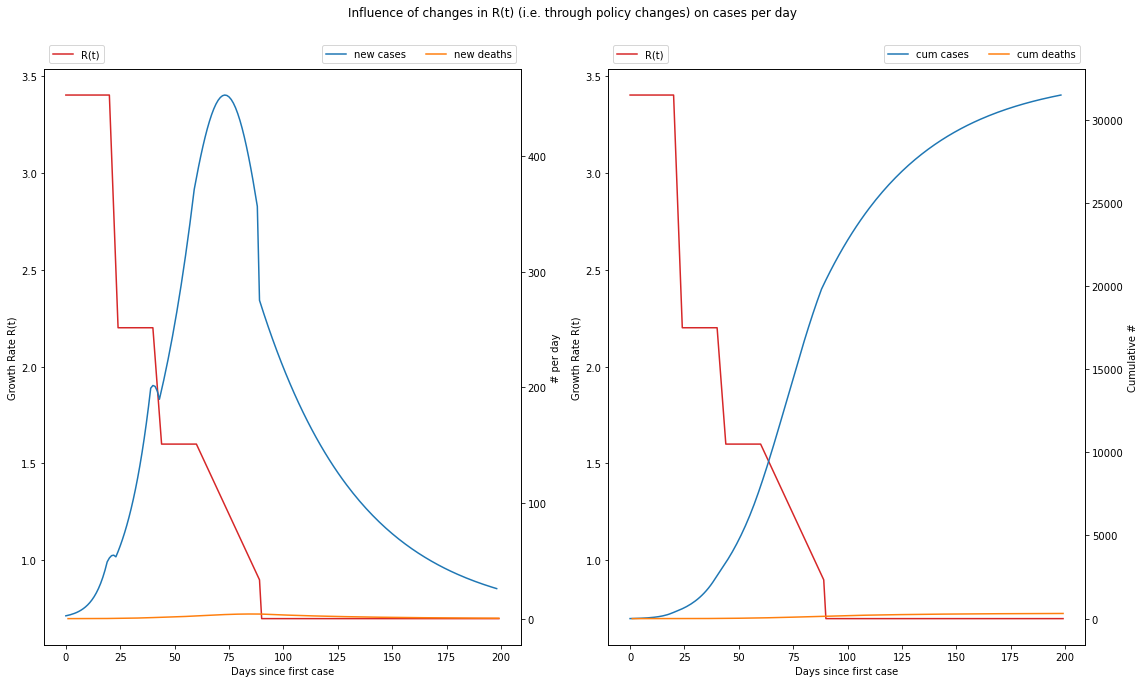

In [402]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax1, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='new cases').diff(-1),
    pd.Series(resistant * .01, name='new deaths').diff(1)
], axis=1).plot(ax=ax2).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax3, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax3.tick_params(axis='y')

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='cum cases').diff(-1),
    pd.Series(resistant * .01, name='cum deaths').diff(1)
], axis=1).cumsum().plot(ax=ax4).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of changes in R(t) (i.e. through policy changes) on cases per day', y=1.05)
fig.set_facecolor('white')
plt.show()

We repeat this plotting exercise with a log scale

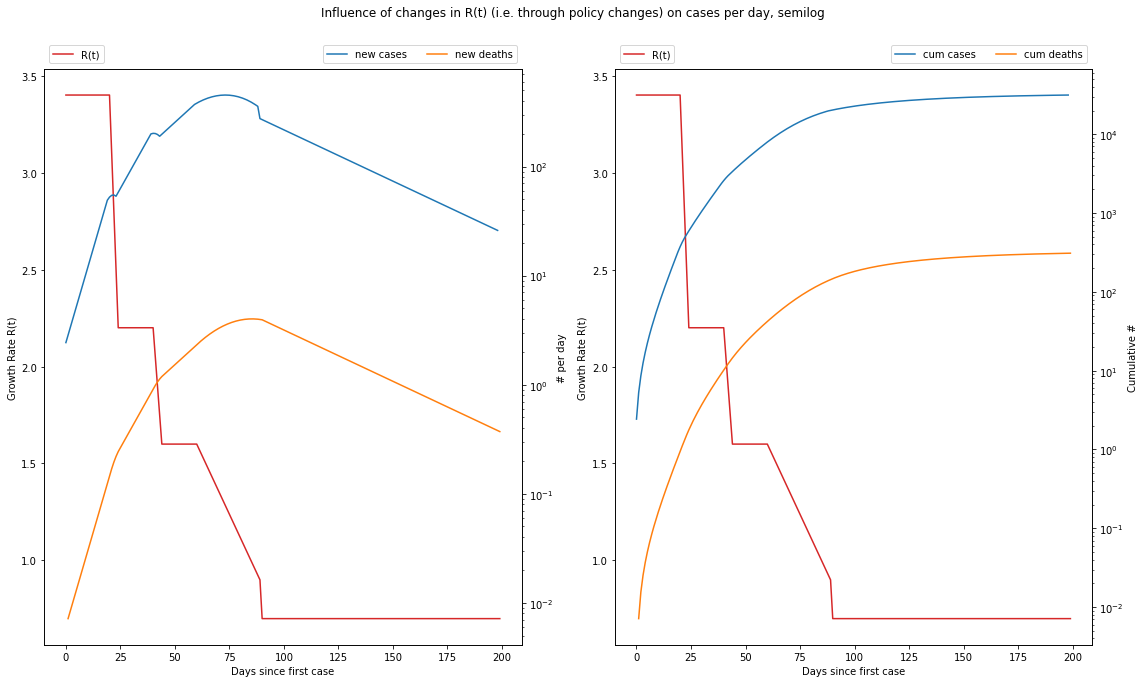

In [403]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax1, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='new cases').diff(-1),
    pd.Series(resistant * .01, name='new deaths').diff(1)
], axis=1).plot(ax=ax2, logy=True).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax3, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax3.tick_params(axis='y')

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='cum cases').diff(-1),
    pd.Series(resistant * .01, name='cum deaths').diff(1)
], axis=1).cumsum().plot(ax=ax4, logy=True).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of changes in R(t) (i.e. through policy changes) on cases per day, semilog', y=1.05)
fig.set_facecolor('white')
plt.show()

As can be seen, the policy changes can result in plateaus in confirmed cases per day. Notably, the progression of deaths per day does not seem to have the same pattern, but this is largely an artifact of simplistic model assumptions. With more stochasticity, the possibility of temporary dips or stability is much higher.

However, other network mechanics make this type of effect even more profound. For example, lets consider two different populations that are being treated as one.

### Modeling of dips that are in response to different populations responding differently to policy measures.

In the below model, two isolated populations of equal size have their R(t) change over time linearly for a few days after policy implementation, before settling at a new level. 

In the first population, the initial case load is higher, but they respond more directly to the policy changes, bringing their effective reproduction rate below 1.

In the second populatino, the initial case load is lower, but they do not respond as much to the policy changes, and their effective reproduction rate stay above 1.

In [412]:
susceptible = np.zeros((200, 2))
infected = np.zeros((200, 2))
resistant = np.zeros((200, 2))
susceptible[0:] = 5e6, 5e6
infected[0,:] = 10000, 1000
infection_length = 14
growth_rate_a = np.concatenate([
    np.repeat(3.4, 10),
    np.linspace(3.4, .7, 5),
    np.repeat(.7, 200)
])[:200]
growth_rate_b = np.concatenate([
    np.repeat(3.4, 10),
    np.linspace(3.4, 1.5, 10),
    np.repeat(1.5, 200)
])[:200]
growth_rate = np.column_stack((np.array(growth_rate_a), np.array(growth_rate_b)))
for v in range(len(susceptible)):
    if v != 0:
        susceptible[v] = susceptible[v - 1] - infected[v - 1] * growth_rate[v]/infection_length
        infected[v] = infected[v - 1] + infected[v - 1] * growth_rate[v]/infection_length - infected[v - 1]/infection_length
        resistant[v] = resistant[v - 1] + infected[v - 1]/infection_length

In [413]:
new_infections_per_day = pd.DataFrame(susceptible, columns=['a', 'b']).diff(-1)
new_infections_per_day = new_infections_per_day.assign(total=new_infections_per_day.a + new_infections_per_day.b)

new_deaths_per_day = pd.DataFrame(resistant * .01, columns=['a', 'b']).diff(1)
new_deaths_per_day = new_deaths_per_day.assign(total=new_deaths_per_day.a + new_deaths_per_day.b)

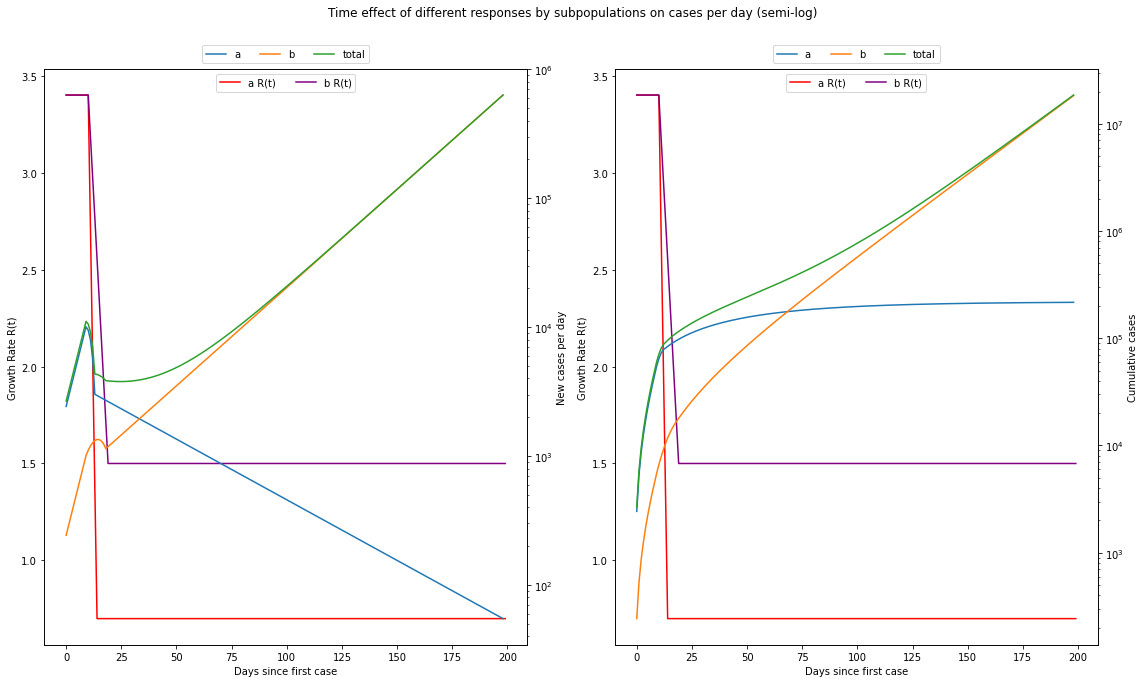

In [414]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax1, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=3, fancybox=True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New cases per day')  # we already handled the x-label with ax1
new_infections_per_day.plot(ax=ax2, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax3, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative cases')  # we already handled the x-label with ax1
new_infections_per_day.cumsum().plot(ax=ax4, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Time effect of different responses by subpopulations on cases per day (semi-log)', y=1.05)
fig.set_facecolor('white')
plt.show()

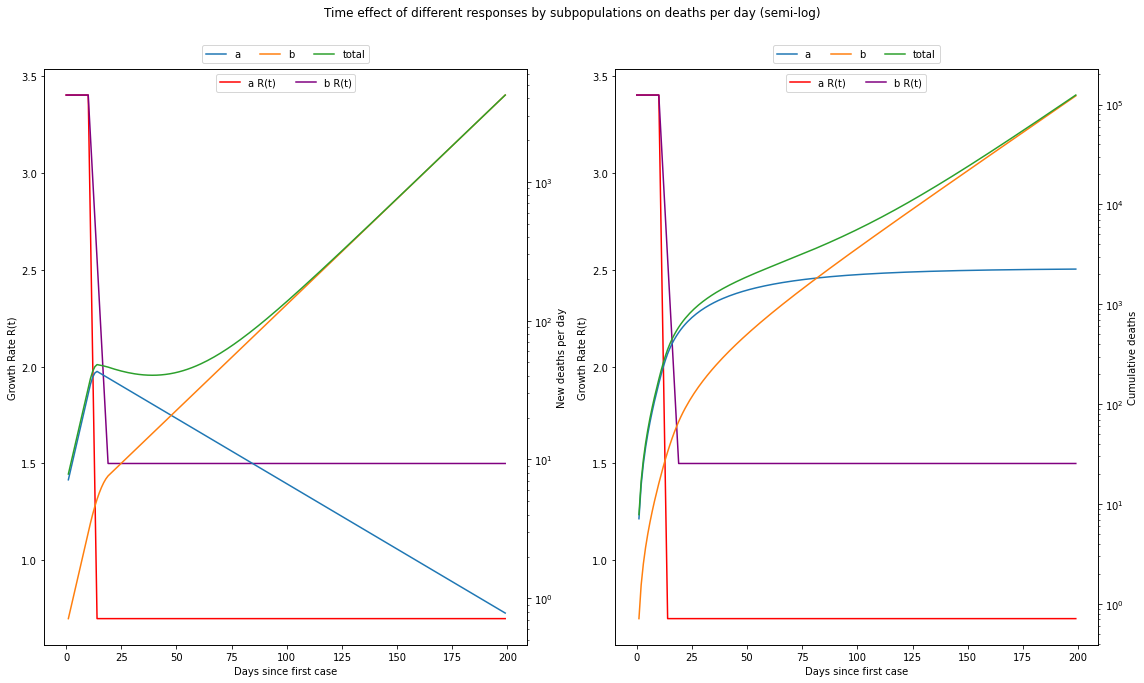

In [415]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax1, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=3, fancybox=True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New deaths per day')  # we already handled the x-label with ax1
new_deaths_per_day.plot(ax=ax2, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax3, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative deaths')  # we already handled the x-label with ax1
new_deaths_per_day.cumsum().plot(ax=ax4, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Time effect of different responses by subpopulations on deaths per day (semi-log)', y=1.05)
fig.set_facecolor('white')
plt.show()

In this case, a profound dip in the number of deaths is temporarily visible even in the deaths per day. 

This simulation assumes two isolated populations, but in reality these populations are likely to mix to some degree. As the second population's infection count increases, it is possible that mixing could bring the effective reproduction number of the other population back above 1 over time.